In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [111]:
cwd=os.getcwd()
data_vehicles_path=os.path.join(cwd,"data_vehicles_french1.csv")
data_vehicles_2015_2022 = pd.read_csv(data_vehicles_path, low_memory=False).fillna(0)


In [202]:
repartitionvehiculesneufs_path = os.path.join(cwd,"sect-ind-auto-immat-energie.xlsx")
repartitionvehiculesneufs = pd.read_excel(repartitionvehiculesneufs_path,header=3,)

In [204]:
repartitionvehiculesneufs.columns

Index([                          'Type d'énergie',
                                             2001,
                                             2002,
                                             2003,
                                             2004,
                                             2005,
                                             2006,
                                             2007,
                                             2008,
                                             2009,
                                             2010,
                                             2011,
                                             2012,
                                             2013,
                                             2014,
                                             2015,
                                             2016,
                                             2017,
                                             2018,
                               

In [205]:
repartitionvehiculesneufs = repartitionvehiculesneufs.loc[[0,1,2,3,4,5],:]

In [207]:
repartitionvehiculesneufs_2015_2021=repartitionvehiculesneufs[["Type d'énergie",2015,2021]]
repartitionvehiculesneufs_2015_2021

,Type d'énergie,2015,2021
0,Essence,739.374,669.928
1,Diesel,1097.122,349.479
2,Hybride1,61.617,430.899
3,Électricité,17.268,162.106
4,Bicarburation (essence + GPL + GNV),1.553,46.422
5,Autres2,0.288,0.170


0    0.385649
1    0.572246
2    0.032139
3    0.009007
4    0.000810
5    0.000150
Name: 2015, dtype: float64


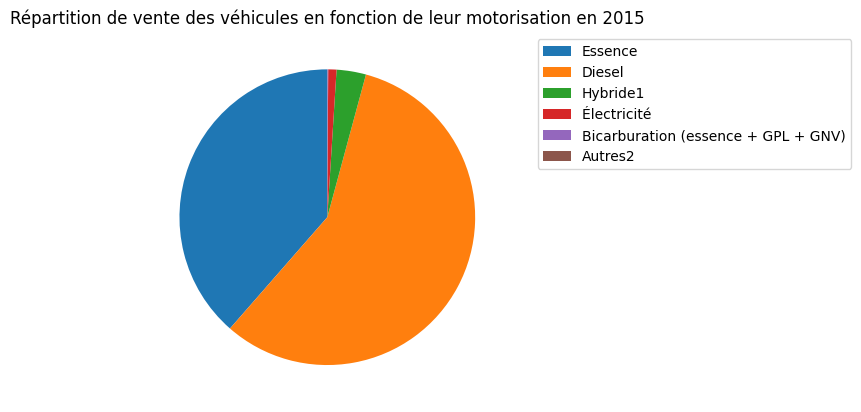

0    0.403813
1    0.210656
2    0.259734
3    0.097713
4    0.027982
5    0.000102
Name: 2021, dtype: float64


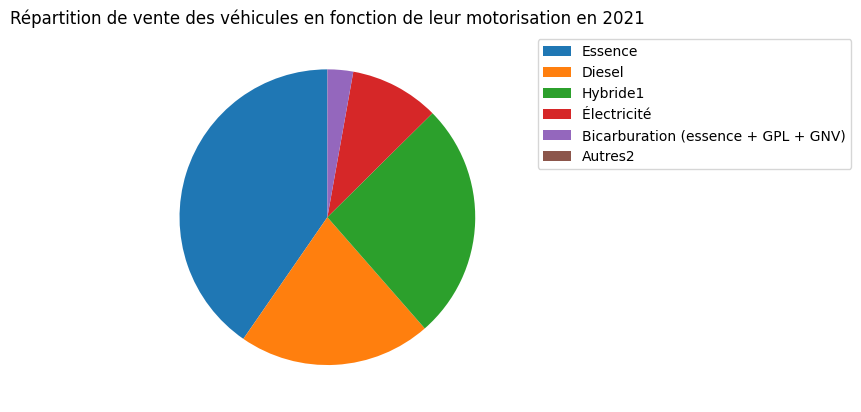

In [223]:
year=[2015,2021]
for i in year:
    data=repartitionvehiculesneufs[["Type d'énergie",i]]
    plt.pie( data.loc[:,i], labels= data.loc[:,"Type d'énergie"], autopct=None, startangle=90, labeldistance=None)
    val_legende=data.loc[:,i]/(sum(data.loc[:,i]))
    print(val_legende)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition de vente des véhicules en fonction de leur motorisation en {}'.format(i))
    plt.show()

In [112]:
data_vehicles_2015_2022.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [114]:
#on garde seulement les colonnes qui nous intéressent
data_vehicles_final=data_vehicles_2015_2022.loc[:,['Mp','Cn','year','Ft','m (kg)','Enedc (g/km)','Electric range (km)','Fuel consumption ']].drop_duplicates(subset='Cn',keep='first').sort_values('year',ascending=True) 
#on reshape les data 
data_vehicles_final['Ft']=data_vehicles_final['Ft'].apply(lambda x : x.lower())


,Mp,Cn,year,Ft,m (kg),Enedc (g/km),Electric range (km),Fuel consumption
0,RENAULT,MEGANE GT LINE TOMTOM TCE AUTO,2015,petrol,1280.0,129.0,0.0,0.0
27806,0,7JBHZM/2S,2015,diesel,1473.0,113.0,0.0,0.0
27804,0,7,2015,diesel,1449.0,113.0,0.0,0.0
27717,0,5048SWACTIVEHDI,2015,diesel,1505.0,105.0,0.0,0.0
27716,0,5048SWACTIVE,2015,diesel,1505.0,105.0,0.0,0.0


In [109]:
#on garde seulement les colonnes qui nous intéressent
data20221=data2022.loc[:,['Mp','Cn','year','Ft','m (kg)','Enedc (g/km)','Electric range (km)','Fuel consumption ']].drop_duplicates(subset='Cn',keep='first').sort_values('year',ascending=True) 
#on reshape les data 
data20221['Ft']=data20221['Ft'].apply(lambda x : x.lower())

In [123]:
data_vehicles_final[data_vehicles_final["year"]==2015]

,Mp,Cn,year,Ft,m (kg),Enedc (g/km),Electric range (km),Fuel consumption
0,RENAULT,MEGANE GT LINE TOMTOM TCE AUTO,2015,petrol,1280.0,129.0,0.0,0.0
27806,0,7JBHZM/2S,2015,diesel,1473.0,113.0,0.0,0.0
27804,0,7,2015,diesel,1449.0,113.0,0.0,0.0
27717,0,5048SWACTIVEHDI,2015,diesel,1505.0,105.0,0.0,0.0
27716,0,5048SWACTIVE,2015,diesel,1505.0,105.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5609,0,308 ALLURE SW PURE TECH S/S,2015,petrol,1265.0,115.0,0.0,0.0
5626,0,2008 ALLURE,2015,petrol,1120.0,114.0,0.0,0.0
5630,0,208 ALLURE S/S AUTO,2015,petrol,1155.0,104.0,0.0,0.0
5631,0,208 GT LINE PURE TECH S/S AUTO,2015,petrol,1155.0,104.0,0.0,0.0


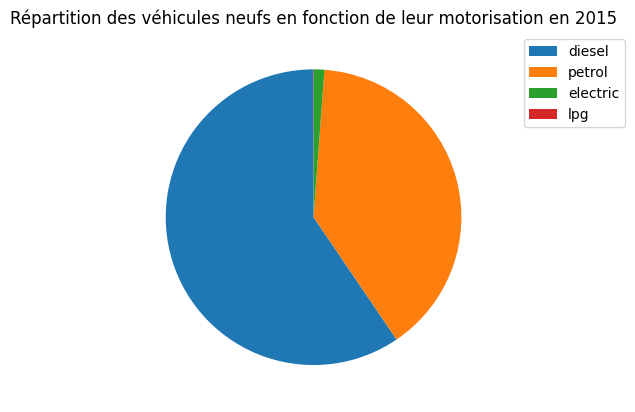

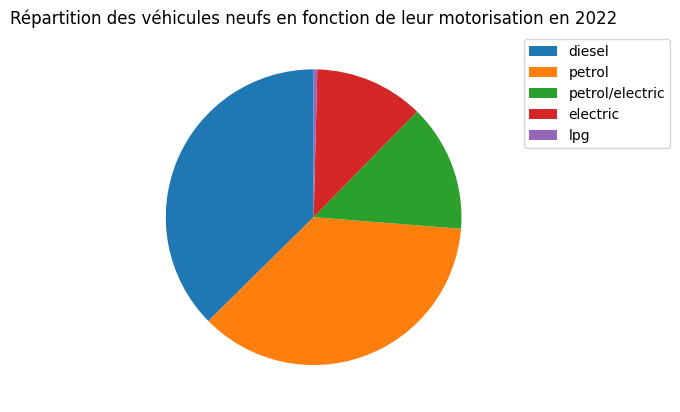

In [224]:
#affichage de la répartition des véhicules neufs dévéloppés par les constructeurs français

year=[2015,2022]
for i in range(len(year)):
    data=data_vehicles_final[data_vehicles_final["year"]==year[i]]
    compt_ft=data['Ft'].value_counts()
    plt.pie(compt_ft.values, labels=compt_ft.index, startangle=90,labeldistance=None)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition des véhicules neufs en fonction de leur motorisation en {}'.format(year[i]))
    plt.show()